In [2]:
import sys
import os

# Get the absolute path of parent folder
current_dir = os.path.abspath("")
parent_dir = os.path.join(current_dir, os.pardir)

# Add to sys.path
sys.path.append(parent_dir)

In [3]:
import ml_combat as ml
from ml_combat import data, module_dir
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
avg = pd.read_csv('../submissions/CatComposite_20models_BEST.csv')
xgbc_simen = pd.read_csv('../submissions/CatComposite_new_features_x20_lr0.03_iters8000_nothing_random.csv')

In [7]:

import plotly.express as px
avg['jacob_new'] = xgbc_simen['prediction']

print( (abs(avg['jacob_new'] - avg['prediction']).mean()))

fig = px.line(avg[avg['prediction'] > 1000], x='id', y=['prediction', 'jacob_new'], markers=True)
fig.show()

#FIRST: 11.803380395250466
#SECOND: 11.803380395250466

11.803380395250466


In [ ]:
print(xgbc_simen.head(25))

avg.plot()
xgbc_simen.plot()

avg['prediction'] = avg['prediction']*1/2 + xgbc_simen['prediction']*1/2
print(avg.head(25))

In [7]:
avg.to_csv('../submissions/blaalbabla.csv', index=False)

In [10]:
submission_143 = pd.read_csv('../submissions/CompositeComposite_XGBComp_GluonNoDate_Cat_runJacob.csv')
avg['diff'] = avg['prediction'] - submission_143['prediction']

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

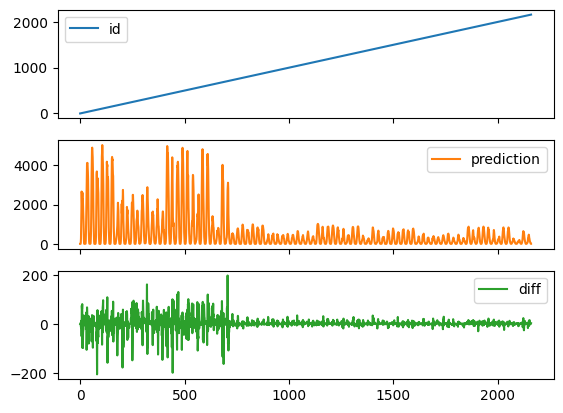

In [11]:
avg.plot(subplots=True)

In [16]:
cat_comp = pd.read_csv('../submissions/CatComposite_50models_henrik_samp_weight.csv')
lgbm_comp = pd.read_csv('../submissions/LGBMComp_new.csv')

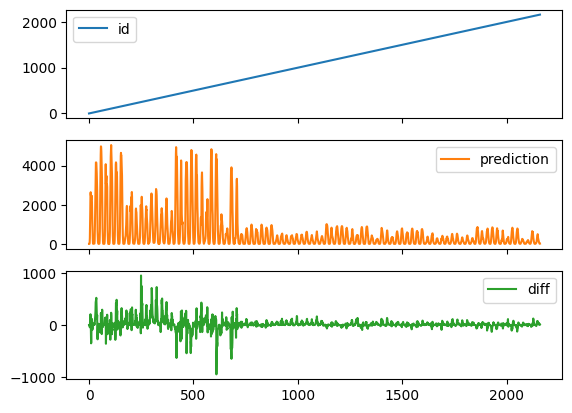

In [17]:
cat_comp['diff'] = cat_comp['prediction'] - lgbm_comp['prediction']
cat_comp.plot(subplots=True)

lgbm_comp['prediction'] = cat_comp['prediction'] * 1/2 + lgbm_comp['prediction'] * 1/2
lgbm_comp.head(10)

lgbm_comp.to_csv('LGBM_X_CAT.csv', index=False)

In [43]:
df_train = data.get_training_flattened()
df_test = data.get_testing_flattened()
print(df_test.columns)

Index(['location', 'ds', 'weather_data_type', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 

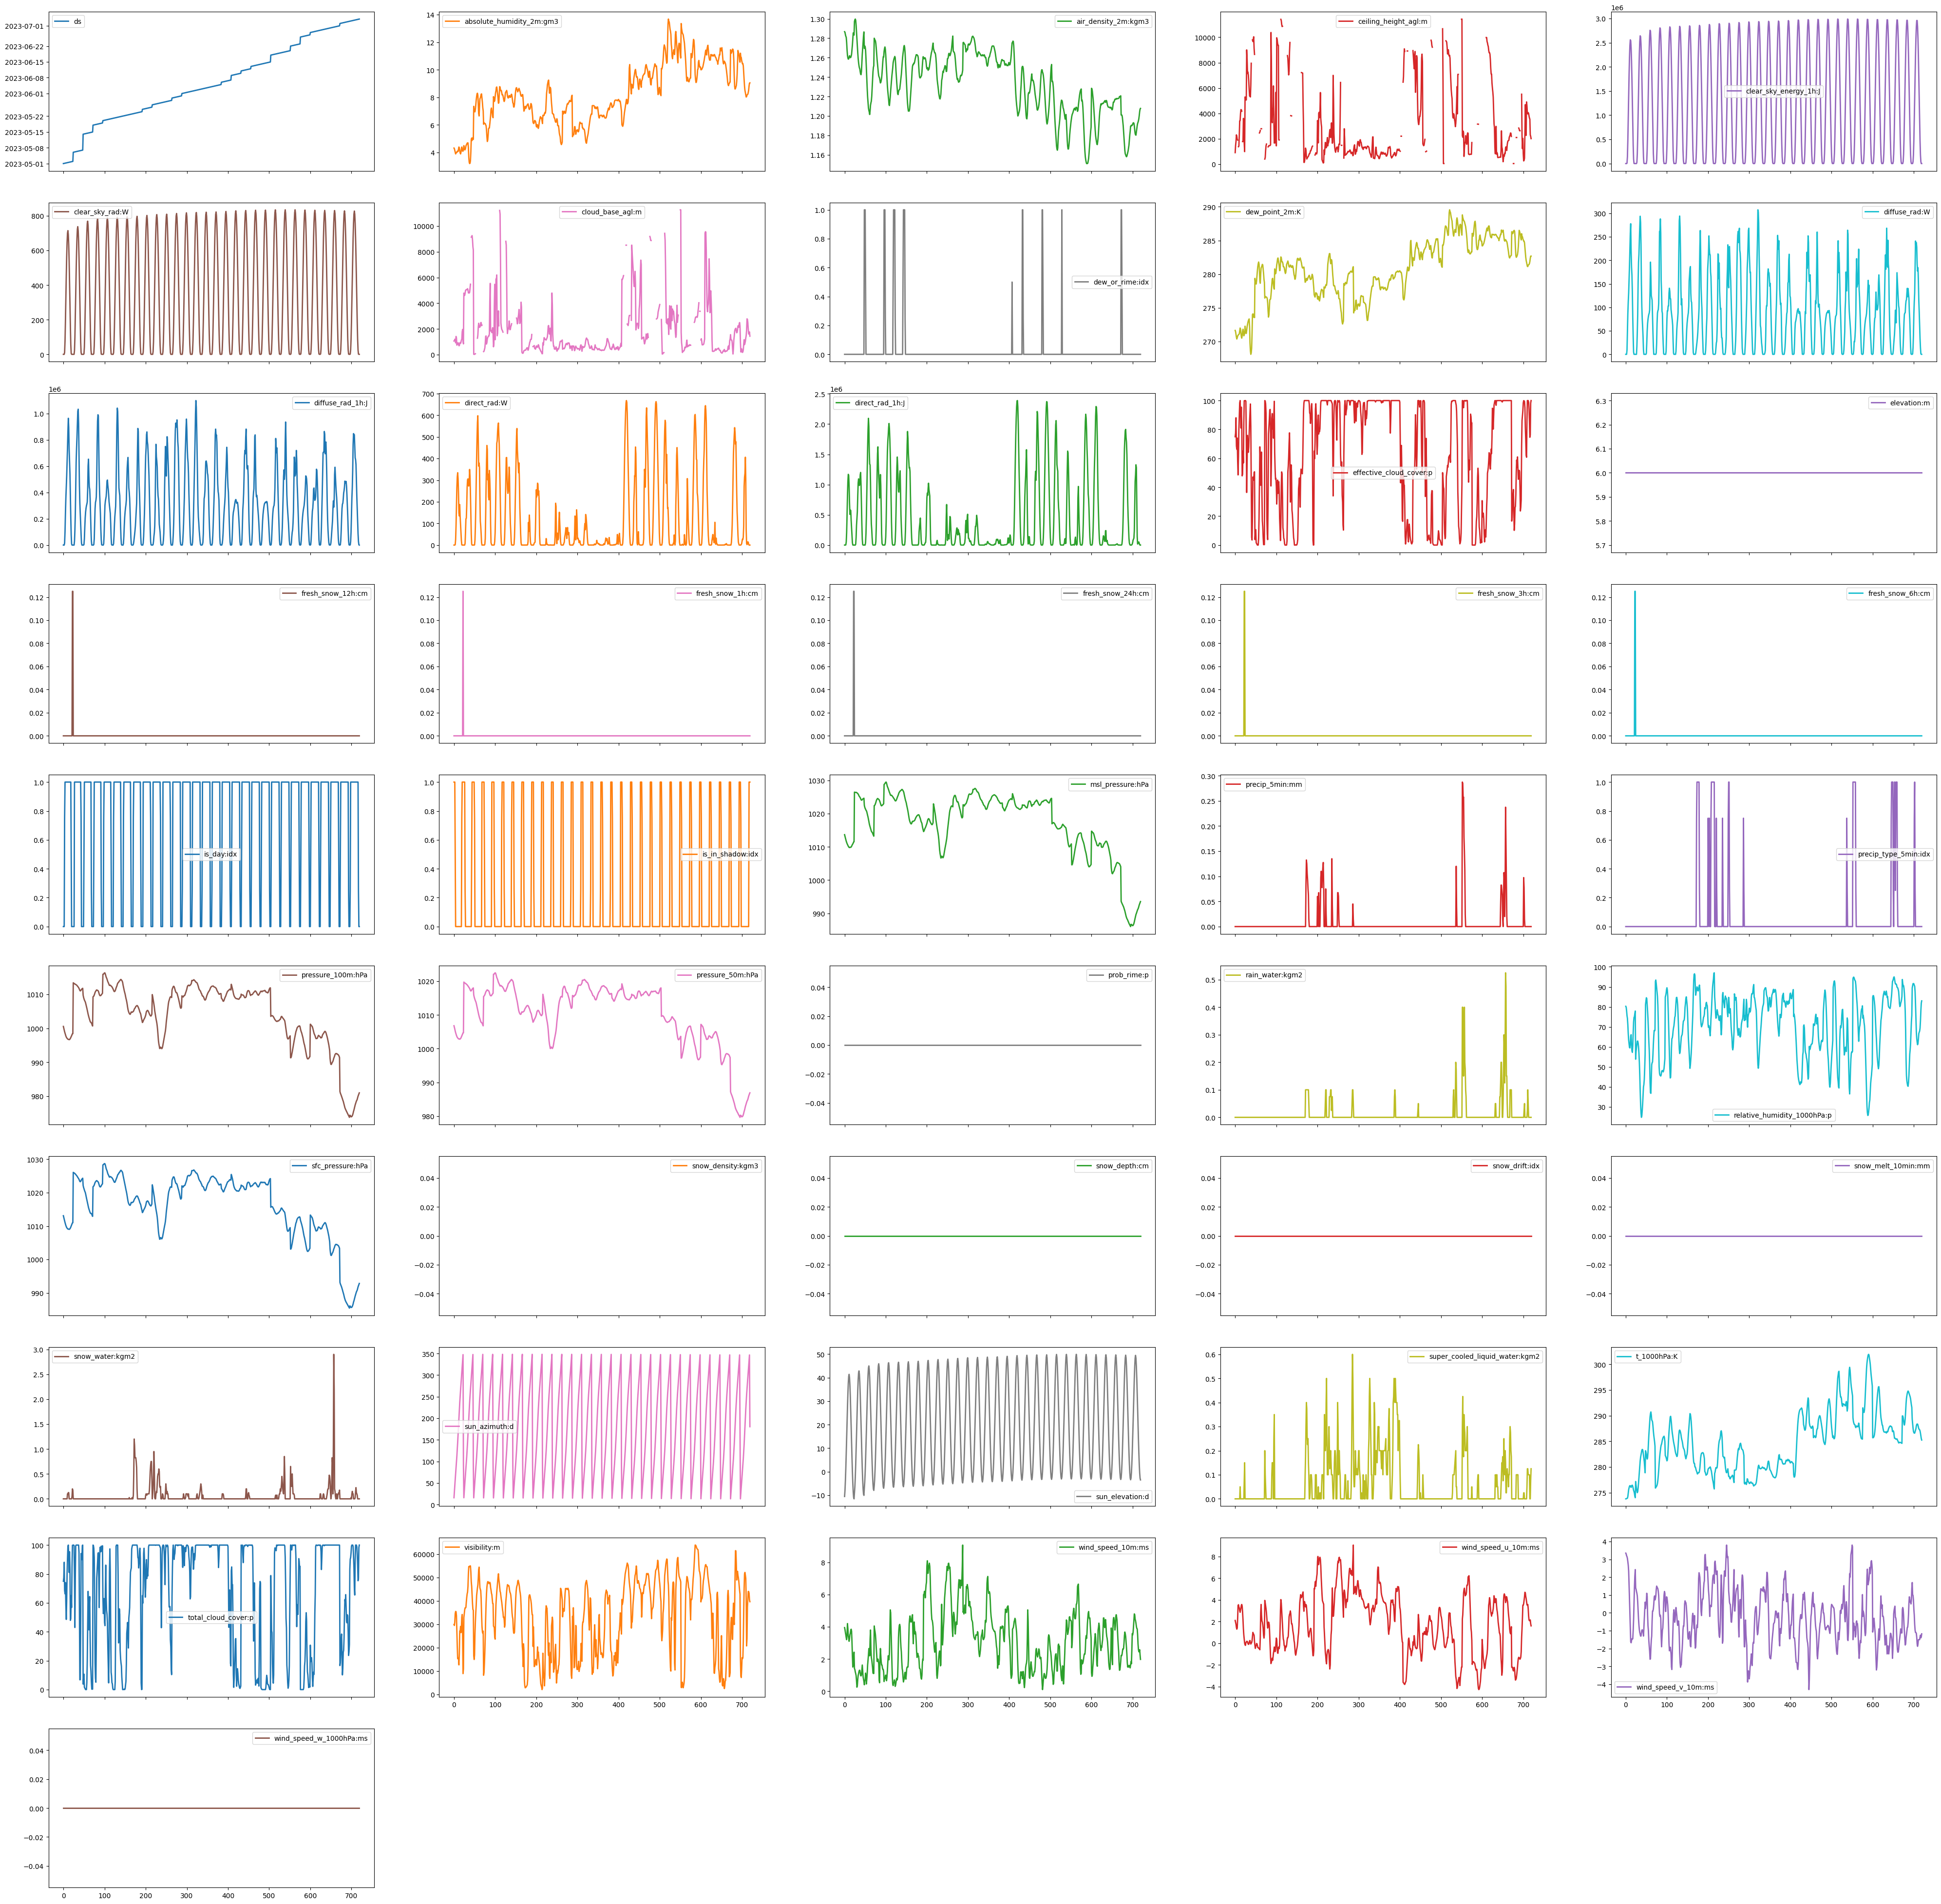

In [13]:
df_test[df_test['location'] == 'A'].plot(subplots=True, layout=(10, 5), figsize=(50, 50), linewidth=2)
plt.savefig('test_feature_overview_A.png')

In [36]:
features = ['location', 'ds', 'weather_data_type', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p','fresh_snow_3h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'precip_5min:mm','precip_type_5min:idx', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa','snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms']

len(features)

34

In [22]:
import plotly.express as px

<Axes: >

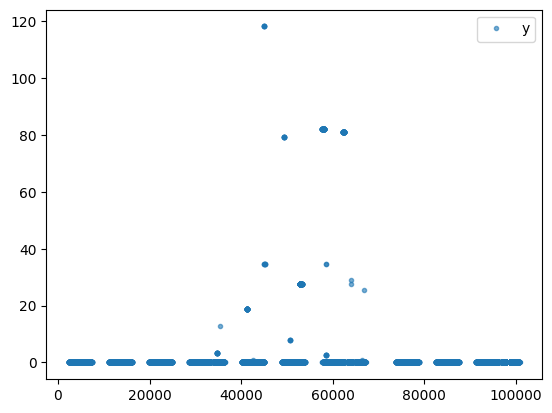

In [42]:
df_train[df_train['sun_elevation:d'] < -20][['y']].plot(linestyle='none',marker='.', alpha=0.6) 

In [ ]:
import tensorflow as tf
from keras.utils import timeseries_dataset_from_array
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train.head()

,location,ds,y,weather_data_type,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,A,2019-06-02 22:00:00,0.00,observed,7.700,1.22825,1728.950012,0.000000,0.00,1728.950012,...,348.036758,-3.77425,0.0,286.224998,100.000,40386.475586,3.600,-3.575,-0.500,0.0
1,A,2019-06-02 23:00:00,0.00,observed,7.700,1.22350,1689.824982,0.000000,0.00,1689.824982,...,91.980751,-4.35725,0.0,286.899994,100.000,33770.649414,3.350,-3.350,0.275,0.0
2,A,2019-06-03 00:00:00,0.00,observed,7.875,1.21975,1563.225006,0.000000,0.00,1563.225006,...,14.934750,-3.30950,0.0,286.949997,100.000,13595.500000,3.050,-2.950,0.750,0.0
3,A,2019-06-03 01:00:00,0.00,observed,8.425,1.21800,1283.425018,208.649994,0.75,1283.425018,...,28.630250,-0.82250,0.0,286.750000,100.000,2321.850037,2.725,-2.600,0.875,0.0
4,A,2019-06-03 02:00:00,19.36,observed,8.950,1.21800,1003.500000,32468.150269,23.10,1003.500000,...,41.997500,3.05125,0.0,286.449997,99.225,11634.799683,2.550,-2.350,0.925,0.0


In [ ]:
temp_df = df_train[df_train['location'] == 'A']

temp_df['total_rad_1h:J'] = temp_df['diffuse_rad_1h:J'] + temp_df['direct_rad_1h:J']

temp_df['total_rad_1h:J'].ffill(inplace=True)
temp_df['total_rad_1h:J'].bfill(inplace=True)

temp_df['total_rad_1h:J'].fillna(temp_df['total_rad_1h:J'].interpolate().cummax(), inplace=True)

if('y' in temp_df.columns.tolist()):
    temp_df['y'].fillna(temp_df['y'].interpolate().cummax(), inplace=True)

model = LinearRegression()


temp_df = temp_df[temp_df['elevation:m'].notna()]

model.fit(temp_df['total_rad_1h:J'].values.reshape(-1, 1), temp_df['y'].values.reshape(-1, 1))

lin_y_preds = model.predict(temp_df['total_rad_1h:J'].values.reshape(-1, 1))

print(lin_y_preds)


temp_df['lin_y_preds'] = lin_y_preds

temp_df['y_resid'] = temp_df['y'] - temp_df['lin_y_preds']

temp_df.corr()['y_resid'].sort_values()

C:\Users\Henrik\AppData\Local\Temp\ipykernel_13928\89298406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['total_rad_1h:J'] = temp_df['diffuse_rad_1h:J'] + temp_df['direct_rad_1h:J']
C:\Users\Henrik\AppData\Local\Temp\ipykernel_13928\89298406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['total_rad_1h:J'].ffill(inplace=True)
C:\Users\Henrik\AppData\Local\Temp\ipykernel_13928\89298406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

[[7.54898906]
 [7.54898906]
 [7.54898906]
 ...
 [7.54898906]
 [7.54898906]
 [7.54898906]]


sun_azimuth:d                    -1.351301e-01
t_1000hPa:K                      -8.593071e-02
total_cloud_cover:p              -8.402544e-02
effective_cloud_cover:p          -7.509228e-02
wind_speed_10m:ms                -6.463119e-02
absolute_humidity_2m:gm3         -6.225708e-02
precip_type_5min:idx             -6.211512e-02
precip_5min:mm                   -5.938210e-02
wind_speed_u_10m:ms              -5.433942e-02
dew_point_2m:K                   -4.871720e-02
diffuse_rad_1h:J                 -3.963175e-02
ceiling_height_agl:m             -3.419549e-02
is_in_shadow:idx                 -2.935582e-02
fresh_snow_24h:cm                -2.535504e-02
snow_water:kgm2                  -2.477917e-02
fresh_snow_12h:cm                -1.759103e-02
snow_depth:cm                    -1.585523e-02
rain_water:kgm2                  -1.422050e-02
fresh_snow_6h:cm                 -1.077588e-02
wind_speed_w_1000hPa:ms          -9.489192e-03
snow_melt_10min:mm               -9.035225e-03
diffuse_rad:W

In [ ]:
composite_df = pd.read_csv('../submissions/TreeCompositeHenrik.csv')
gluon_df = pd.read_csv('../submissions/')

PermissionError: [Errno 13] Permission denied: '../submissions/'